<a href="https://colab.research.google.com/github/suyeon-9706/TrendWithSNS/blob/suyeon/total_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# colab에서 코드 돌림(google drive에서 data 가져옴)
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# 모든 팀의 좋아요 증가율
total_avg = {}

In [0]:
# 모든 데이터 다 불러오기
import os
import json

# 팀: GenG
geng_dic = {} # 딕셔너리
geng_key = [] # 리스트

for root, dirs, files in os.walk('/content/drive/My Drive/grad_data/data/data/GenG'):
    for fname in files:
      if fname.endswith(".json"): #끝이 ".json"로 끝나는 경우
        full_fname = os.path.join(root, fname)
        geng_key.append(fname)
        
        with open(full_fname) as json_file:
          json_data = json.load(json_file)
          geng_dic[fname] = json_data
        
geng_key.sort() #  리스트 오름차순 정렬

In [0]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

geng_total_likes = []
geng_convert_time = []
geng_length = []

for name in geng_key:
  values = geng_dic[name]['results'][0]['series'][0]['values']
  
  # total_likes: 주어진 데이터의 2번째 value들
  length = len(values)  
  geng_length.append(length)
  print(name,":",length)
  for i in range(0,length):
      geng_total_likes.append(values[i][2])
  
  # conver_times: 주어진 데이터의 0번째 value들
  for i in range(0, length):
      geng_convert_time.append(datetime.datetime.strptime(values[i][0][:19],"%Y-%m-%dT%H:%M:%S"))    

GenG_20190605.json : 12
GenG_20190606.json : 12
GenG_20190607.json : 12
GenG_20190608.json : 12
GenG_20190609.json : 12
GenG_20190610.json : 12
GenG_20190611.json : 12
GenG_20190612.json : 45
GenG_20190613.json : 144
GenG_20190614.json : 144
GenG_20190615.json : 144
GenG_20190616.json : 144
GenG_20190620.json : 730
GenG_20190623.json : 437
GenG_20190625.json : 437
GenG_20190626.json : 437
GenG_20190630.json : 437
GenG_20190701.json : 437
GenG_20190703.json : 437
GenG_20190705.json : 437
GenG_20190706.json : 437


In [0]:
# total_likes2 = total_likes의 차이값들(하루 단위)
geng_total_likes2 = []
geng_differences = []
geng_date = []
for name in geng_key:
  values = geng_dic[name]['results'][0]['series'][0]['values']
  length = len(values)  
  geng_total_likes2.append(values[length-1][2])
  geng_date.append(datetime.datetime.strptime(values[0][0][:10],"%Y-%m-%d"))    

for i in range(0,len(geng_date)-1):
  geng_differences.append(geng_total_likes2[i+1]-geng_total_likes2[i])

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


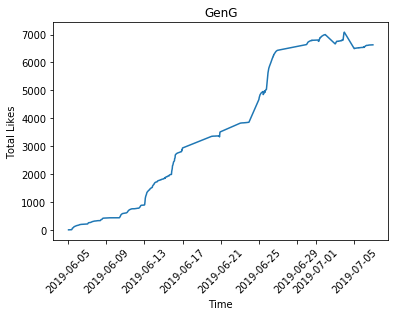

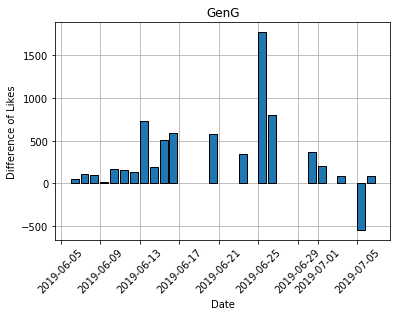

In [0]:
# 시간에 따른 total likes 값들 시각화
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

plt.plot(geng_convert_time, geng_total_likes)
plt.title('GenG')
plt.xlabel('Time')
plt.ylabel('Total Likes')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

# 시간에 따른 total likes 차이값들 시각화(막대그래프)
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

bar_graph = plt.bar(geng_date[1:], geng_differences, align='edge', edgecolor='black')
plt.title('GenG')
plt.xlabel('Date')
plt.ylabel('Difference of Likes')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_axisbelow(True)
plt.grid(True)
plt.show()

In [0]:
# 좋아요 증가율 구하기
import numpy as np

average = []
sum = 0

for i in geng_length:
  sum = sum+i
  avg = (geng_total_likes[sum-1] - geng_total_likes[sum-i])/(geng_convert_time[sum-1] - geng_convert_time[sum-i]).seconds*60
  average.append(avg)

geng_avg = np.mean(average)
total_avg['GenG'] = geng_avg
print("GenG 좋아요 증가율:", geng_avg)

GenG 좋아요 증가율: 0.19293688352608956


In [0]:
# 팀: Griffin
gri_dic = {} # 딕셔너리
gri_key = [] # 리스트

for root, dirs, files in os.walk('/content/drive/My Drive/grad_data/data/data/Griffin'):
    for fname in files:
      if fname.endswith(".json"): #끝이 ".json"로 끝나는 경우
        full_fname = os.path.join(root, fname)
        gri_key.append(fname)
        
        with open(full_fname) as json_file:
          json_data = json.load(json_file)
          gri_dic[fname] = json_data
      
gri_key.sort() #  리스트 오름차순 정렬

In [0]:
gri_total_likes = []
gri_convert_time = []
gri_length = []

for name in gri_key:
  values = gri_dic[name]['results'][0]['series'][0]['values']
  
  # total_likes: 주어진 데이터의 2번째 value들
  length = len(values)
  gri_length.append(length)
  print(name,":", length)
  for i in range(0,length):
      gri_total_likes.append(values[i][2])
  
  # conver_times: 주어진 데이터의 0번째 value들
  for i in range(0, length):
      gri_convert_time.append(datetime.datetime.strptime(values[i][0][:19],"%Y-%m-%dT%H:%M:%S"))

Griffin_20190605.json : 12
Griffin_20190606.json : 12
Griffin_20190607.json : 12
Griffin_20190608.json : 12
Griffin_20190609.json : 12
Griffin_20190610.json : 12
Griffin_20190611.json : 12
Griffin_20190612.json : 45
Griffin_20190613.json : 144


In [0]:
# total_likes2 = total_likes의 차이값들(하루 단위)
gri_total_likes2 = []
gri_differences = []
gri_date = []
for name in gri_key:
  values = gri_dic[name]['results'][0]['series'][0]['values']
  length = len(values)  
  gri_total_likes2.append(values[length-1][2])
  gri_date.append(datetime.datetime.strptime(values[0][0][:10],"%Y-%m-%d"))    

for i in range(0,len(gri_date)-1):
  gri_differences.append(gri_total_likes2[i+1]-gri_total_likes2[i])

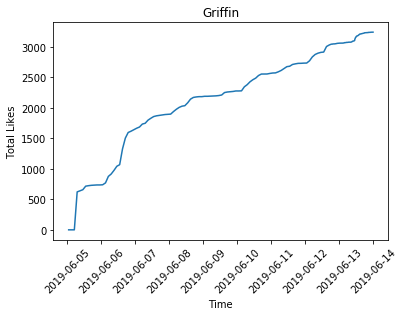

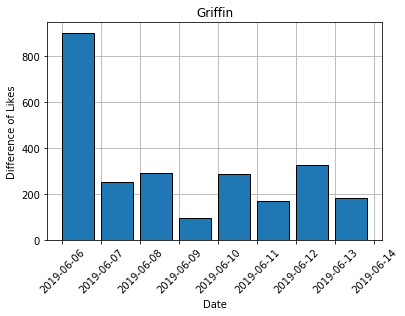

In [0]:
# 시간에 따른 total likes 값들 시각화
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

plt.plot(gri_convert_time, gri_total_likes)
plt.title('Griffin')
plt.xlabel('Time')
plt.ylabel('Total Likes')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

# 시간에 따른 total likes 차이값들 시각화(막대그래프)
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

bar_graph = plt.bar(gri_date[1:], gri_differences, align='edge', edgecolor='black')
plt.title('Griffin')
plt.xlabel('Date')
plt.ylabel('Difference of Likes')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_axisbelow(True)
plt.grid(True)
plt.show()    

In [0]:
average = []
sum = 0

for i in gri_length:
  sum = sum+i
  avg = (gri_total_likes[sum-1] - gri_total_likes[sum-i])/(gri_convert_time[sum-1] - gri_convert_time[sum-i]).seconds*60
  average.append(avg)

gri_avg = np.mean(average)
total_avg['Griffin'] = gri_avg
print("Griffin 좋아요 증가율:", gri_avg)

Griffin 좋아요 증가율: 0.26635559729037617


In [0]:
# 팀: JinAirGW
jin_dic = {} # 딕셔너리
jin_key = [] # 리스트

for root, dirs, files in os.walk('/content/drive/My Drive/grad_data/data/data/JinAirGW'):
    for fname in files:
      if fname.endswith(".json"): #끝이 ".json"로 끝나는 경우
        full_fname = os.path.join(root, fname)
        jin_key.append(fname)
        
        with open(full_fname) as json_file:
          json_data = json.load(json_file)
          jin_dic[fname] = json_data
      
jin_key.sort() #  리스트 오름차순 정렬

In [0]:
jin_total_likes = []
jin_convert_time = []
jin_length = []

for name in jin_key:
  values = jin_dic[name]['results'][0]['series'][0]['values']
  
  # total_likes: 주어진 데이터의 2번째 value들
  length = len(values)
  jin_length.append(length)
  print(name, ":", length)
  for i in range(0,length):
      jin_total_likes.append(values[i][2])
  
  # conver_times: 주어진 데이터의 0번째 value들
  for i in range(0, length):
      jin_convert_time.append(datetime.datetime.strptime(values[i][0][:19],"%Y-%m-%dT%H:%M:%S"))    

JinAirGW_20190605.json : 12
JinAirGW_20190606.json : 12
JinAirGW_20190607.json : 12
JinAirGW_20190608.json : 12
JinAirGW_20190609.json : 12
JinAirGW_20190611.json : 12
JinAirGW_20190612.json : 45
JinAirGW_20190613.json : 144
JinAirGW_20190614.json : 144
JinAirGW_20190616.json : 144
JinAirGW_20190617.json : 144
JinAirGW_20190618.json : 144
JinAirGW_20190619.json : 144
JinAirGW_20190620.json : 730
JinAirGW_20190621.json : 437
JinAirGW_20190622.json : 437
JinAirGW_20190623.json : 437
JinAirGW_20190624.json : 437
JinAirGW_20190626.json : 437
JinAirGW_20190627.json : 437
JinAirGW_20190628.json : 437
JinAirGW_20190629.json : 437
JinAirGW_20190630.json : 436
JinAirGW_20190701.json : 437
JinAirGW_20190704.json : 437


In [0]:
# total_likes2 = total_likes의 차이값들(하루 단위)
jin_total_likes2 = []
jin_differences = []
jin_date = []
for name in jin_key:
  values = jin_dic[name]['results'][0]['series'][0]['values']
  length = len(values)  
  jin_total_likes2.append(values[length-1][2])
  jin_date.append(datetime.datetime.strptime(values[0][0][:10],"%Y-%m-%d"))    

for i in range(0,len(jin_date)-1):
  jin_differences.append(jin_total_likes2[i+1]-jin_total_likes2[i])

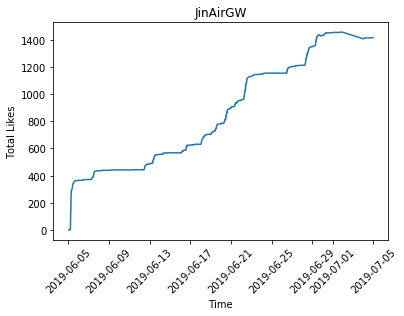

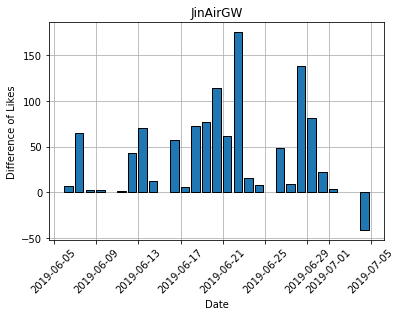

In [0]:
# 시간에 따른 total likes 값들 시각화
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

plt.plot(jin_convert_time, jin_total_likes)
plt.title('JinAirGW')
plt.xlabel('Time')
plt.ylabel('Total Likes')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

# 시간에 따른 total likes 차이값들 시각화(막대그래프)
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

bar_graph = plt.bar(jin_date[1:], jin_differences, align='edge', edgecolor='black')
plt.title('JinAirGW')
plt.xlabel('Date')
plt.ylabel('Difference of Likes')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_axisbelow(True)
plt.grid(True)
plt.show()    

In [0]:
average = []
sum = 0

for i in jin_length:
  sum = sum+i
  avg = (jin_total_likes[sum-1] - jin_total_likes[sum-i])/(jin_convert_time[sum-1] - jin_convert_time[sum-i]).seconds*60
  average.append(avg)

jin_avg = np.mean(average)
total_avg['JinAirGW'] = jin_avg
print("JinAirGW 좋아요 증가율:",jin_avg)

JinAirGW 좋아요 증가율: 0.04235120226826675


In [0]:
# 팀: KINGZONEDX
king_dic = {} # 딕셔너리
king_key = [] # 리스트

for root, dirs, files in os.walk('/content/drive/My Drive/grad_data/data/data/KINGZONEDX'):
    for fname in files:
      if fname.endswith(".json"): #끝이 ".json"로 끝나는 경우
        full_fname = os.path.join(root, fname)
        king_key.append(fname)
        
        with open(full_fname) as json_file:
          json_data = json.load(json_file)
          king_dic[fname] = json_data
        
king_key.sort() #  리스트 오름차순 정렬

In [0]:
king_total_likes = []
king_convert_time = []
king_length = []

for name in king_key:
  values = king_dic[name]['results'][0]['series'][0]['values']
  
  # total_likes: 주어진 데이터의 2번째 value들
  length = len(values)
  king_length.append(length)
  print(name, ":", length)
  for i in range(0,length):
      king_total_likes.append(values[i][2])
  
  # conver_times: 주어진 데이터의 0번째 value들
  for i in range(0, length):
      king_convert_time.append(datetime.datetime.strptime(values[i][0][:19],"%Y-%m-%dT%H:%M:%S"))    

KINGZONEDX_20190605.json : 12
KINGZONEDX_20190606.json : 12
KINGZONEDX_20190607.json : 12
KINGZONEDX_20190608.json : 12
KINGZONEDX_20190609.json : 12
KINGZONEDX_20190610.json : 12
KINGZONEDX_20190611.json : 12
KINGZONEDX_20190612.json : 45
KINGZONEDX_20190613.json : 144
KINGZONEDX_20190614.json : 144
KINGZONEDX_20190615.json : 144
KINGZONEDX_20190616.json : 144
KINGZONEDX_20190617.json : 144
KINGZONEDX_20190618.json : 144
KINGZONEDX_20190619.json : 144
KINGZONEDX_20190620.json : 730
KINGZONEDX_20190621.json : 437
KINGZONEDX_20190622.json : 437
KINGZONEDX_20190623.json : 437
KINGZONEDX_20190625.json : 437
KINGZONEDX_20190628.json : 437
KINGZONEDX_20190630.json : 437
KINGZONEDX_20190702.json : 437
KINGZONEDX_20190703.json : 437
KINGZONEDX_20190704.json : 437
KINGZONEDX_20190705.json : 437
KINGZONEDX_20190706.json : 437


In [0]:
# total_likes2 = total_likes의 차이값들(하루 단위)
king_total_likes2 = []
king_differences = []
king_date = []
for name in king_key:
  values = king_dic[name]['results'][0]['series'][0]['values']
  length = len(values)  
  king_total_likes2.append(values[length-1][2])
  king_date.append(datetime.datetime.strptime(values[0][0][:10],"%Y-%m-%d"))    

for i in range(0,len(king_date)-1):
  king_differences.append(king_total_likes2[i+1]-king_total_likes2[i])

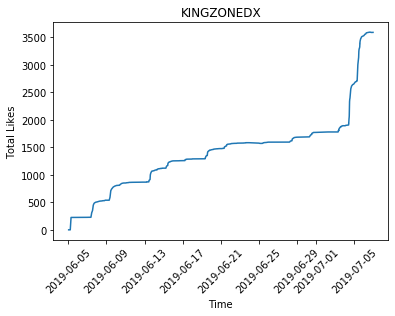

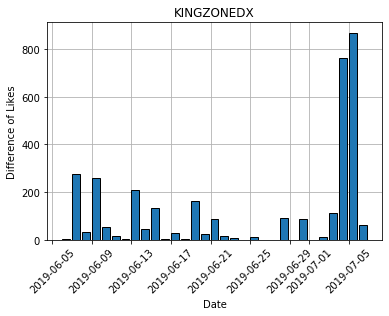

In [0]:
# 시간에 따른 total likes 값들 시각화
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

plt.plot(king_convert_time, king_total_likes)
plt.title('KINGZONEDX')
plt.xlabel('Time')
plt.ylabel('Total Likes')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

# 시간에 따른 total likes 차이값들 시각화(막대그래프)
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

bar_graph = plt.bar(king_date[1:], king_differences, align='edge', edgecolor='black')
plt.title('KINGZONEDX')
plt.xlabel('Date')
plt.ylabel('Difference of Likes')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_axisbelow(True)
plt.grid(True)
plt.show()

In [0]:
average = []
sum = 0

for i in king_length:
  sum = sum+i
  avg = (king_total_likes[sum-1] - king_total_likes[sum-i])/(king_convert_time[sum-1] - king_convert_time[sum-i]).seconds*60
  average.append(avg)

king_avg = np.mean(average)
total_avg['KINGZONEDX'] = king_avg
print("KINGZONEDX 좋아요 증가율:",king_avg)

KINGZONEDX 좋아요 증가율: 0.09574563202732521


In [0]:
# 팀: SBGaming_KOR
sb_dic = {} # 딕셔너리
sb_key = [] # 리스트

for root, dirs, files in os.walk('/content/drive/My Drive/grad_data/data/data/SBGaming_KOR'):
    for fname in files:
      if fname.endswith(".json"): #끝이 ".json"로 끝나는 경우
        full_fname = os.path.join(root, fname)
        sb_key.append(fname)
        
        with open(full_fname) as json_file:
          json_data = json.load(json_file)
          sb_dic[fname] = json_data
      
sb_key.sort() #  리스트 오름차순 정렬

In [0]:
sb_total_likes = []
sb_convert_time = []
sb_length = []

for name in sb_key:
  values = sb_dic[name]['results'][0]['series'][0]['values']
  
  # total_likes: 주어진 데이터의 2번째 value들
  length = len(values)
  sb_length.append(length)
  print(name, ":", length)
  for i in range(0,length):
      sb_total_likes.append(values[i][2])
  
  # conver_times: 주어진 데이터의 0번째 value들
  for i in range(0, length):
      sb_convert_time.append(datetime.datetime.strptime(values[i][0][:19],"%Y-%m-%dT%H:%M:%S"))  

SBGaming_KOR_20190605.json : 12
SBGaming_KOR_20190606.json : 12
SBGaming_KOR_20190607.json : 12
SBGaming_KOR_20190608.json : 12
SBGaming_KOR_20190609.json : 12
SBGaming_KOR_20190610.json : 12
SBGaming_KOR_20190612.json : 45
SBGaming_KOR_20190613.json : 144
SBGaming_KOR_20190614.json : 144
SBGaming_KOR_20190615.json : 144
SBGaming_KOR_20190617.json : 144
SBGaming_KOR_20190618.json : 144
SBGaming_KOR_20190619.json : 144
SBGaming_KOR_20190623.json : 437
SBGaming_KOR_20190626.json : 437
SBGaming_KOR_20190627.json : 437
SBGaming_KOR_20190629.json : 437


In [0]:
# total_likes2 = total_likes의 차이값들(하루 단위)
sb_total_likes2 = []
sb_differences = []
sb_date = []
for name in sb_key:
  values = sb_dic[name]['results'][0]['series'][0]['values']
  length = len(values)  
  sb_total_likes2.append(values[length-1][2])
  sb_date.append(datetime.datetime.strptime(values[0][0][:10],"%Y-%m-%d"))    

for i in range(0,len(sb_date)-1):
  sb_differences.append(sb_total_likes2[i+1]-sb_total_likes2[i])

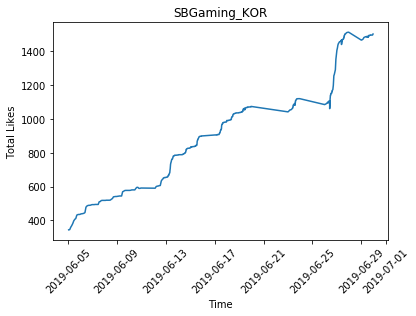

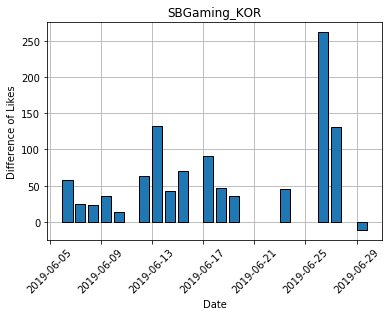

In [0]:
# 시간에 따른 total likes 값들 시각화
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

plt.plot(sb_convert_time, sb_total_likes)
plt.title('SBGaming_KOR')
plt.xlabel('Time')
plt.ylabel('Total Likes')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

# 시간에 따른 total likes 차이값들 시각화(막대그래프)
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

bar_graph = plt.bar(sb_date[1:], sb_differences, align='edge', edgecolor='black')
plt.title('SBGaming_KOR')
plt.xlabel('Date')
plt.ylabel('Difference of Likes')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_axisbelow(True)
plt.grid(True)
plt.show()

In [0]:
average = []
sum = 0

for i in sb_length:
  sum = sum+i
  avg = (sb_total_likes[sum-1] - sb_total_likes[sum-i])/(sb_convert_time[sum-1] - sb_convert_time[sum-i]).seconds*60
  average.append(avg)

sb_avg = np.mean(average)
total_avg['SBGaming_KOR'] = sb_avg
print("SBGaming_KOR 좋아요 증가율:",sb_avg)

SBGaming_KOR 좋아요 증가율: 0.05264825335736596


In [0]:
# 팀: T1LoL
t1_dic = {} # 딕셔너리
t1_key = [] # 리스트

for root, dirs, files in os.walk('/content/drive/My Drive/grad_data/data/data/T1LoL'):
    for fname in files:
      if fname.endswith(".json"): #끝이 ".json"로 끝나는 경우
        full_fname = os.path.join(root, fname)
        t1_key.append(fname)
        
        with open(full_fname) as json_file:
          json_data = json.load(json_file)
          t1_dic[fname] = json_data
        
t1_key.sort() #  리스트 오름차순 정렬

In [0]:
t1_total_likes = []
t1_convert_time = []
t1_length = []

for name in t1_key:
  values = t1_dic[name]['results'][0]['series'][0]['values']
    
  # total_likes: 주어진 데이터의 2번째 value들
  length = len(values)
  t1_length.append(length)
  print(name,":",length)
  for i in range(0,length):
      t1_total_likes.append(values[i][2])
  
  # conver_times: 주어진 데이터의 0번째 value들
  for i in range(0, length):
      t1_convert_time.append(datetime.datetime.strptime(values[i][0][:19],"%Y-%m-%dT%H:%M:%S"))    

T1LoL_20190605.json : 12
T1LoL_20190606.json : 12
T1LoL_20190607.json : 12
T1LoL_20190608.json : 12
T1LoL_20190609.json : 12
T1LoL_20190610.json : 12
T1LoL_20190611.json : 12
T1LoL_20190612.json : 45
T1LoL_20190613.json : 144
T1LoL_20190614.json : 144
T1LoL_20190615.json : 144
T1LoL_20190616.json : 144
T1LoL_20190617.json : 144
T1LoL_20190618.json : 144
T1LoL_20190619.json : 144
T1LoL_20190620.json : 730
T1LoL_20190621.json : 437
T1LoL_20190622.json : 437
T1LoL_20190623.json : 437
T1LoL_20190624.json : 437
T1LoL_20190625.json : 437
T1LoL_20190627.json : 437
T1LoL_20190628.json : 437
T1LoL_20190629.json : 437
T1LoL_20190630.json : 437
T1LoL_20190703.json : 437


In [0]:
# total_likes2 = total_likes의 차이값들(하루 단위)
t1_total_likes2 = []
t1_differences = []
t1_date = []
for name in t1_key:
  values = t1_dic[name]['results'][0]['series'][0]['values']
  length = len(values)  
  t1_total_likes2.append(values[length-1][2])
  t1_date.append(datetime.datetime.strptime(values[0][0][:10],"%Y-%m-%d"))    

for i in range(0,len(t1_date)-1):
  t1_differences.append(t1_total_likes2[i+1]-t1_total_likes2[i])

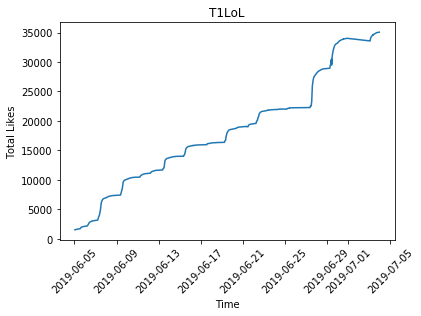

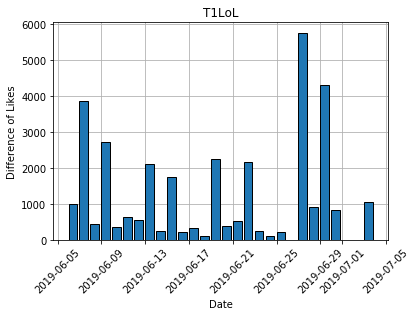

In [0]:
# 시간에 따른 total likes 값들 시각화
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

plt.plot(t1_convert_time, t1_total_likes)
plt.title('T1LoL')
plt.xlabel('Time')
plt.ylabel('Total Likes')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

# 시간에 따른 total likes 차이값들 시각화(막대그래프)
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

bar_graph = plt.bar(t1_date[1:], t1_differences, align='edge', edgecolor='black')
plt.title('T1LoL')
plt.xlabel('Date')
plt.ylabel('Difference of Likes')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_axisbelow(True)
plt.grid(True)
plt.show()

In [0]:
average = []
sum = 0

for i in t1_length:
  sum = sum+i
  avg = (t1_total_likes[sum-1] - t1_total_likes[sum-i])/(t1_convert_time[sum-1] - t1_convert_time[sum-i]).seconds*60
  average.append(avg)

t1_avg = np.mean(average)
total_avg['T1LoL'] = t1_avg
print("T1LoL 좋아요 증가율:",t1_avg)

T1LoL 좋아요 증가율: 0.940677685848136


In [0]:
# 팀: faker
faker_dic = {} # 딕셔너리
faker_key = [] # 리스트

for root, dirs, files in os.walk('/content/drive/My Drive/grad_data/data/data/faker'):
    for fname in files:
      if fname.endswith(".json"): #끝이 ".json"로 끝나는 경우
        full_fname = os.path.join(root, fname)
        faker_key.append(fname)
        
        with open(full_fname) as json_file:
          json_data = json.load(json_file)
          faker_dic[fname] = json_data
        
faker_key.sort() #  리스트 오름차순 정렬

In [0]:
faker_total_likes = []
faker_convert_time = []
faker_length = []

for name in faker_key:
  values = faker_dic[name]['results'][0]['series'][0]['values']
  
  # total_likes: 주어진 데이터의 2번째 value들
  length = len(values)
  faker_length.append(length)
  print(name,":",length)
  
  for i in range(0,length):
      faker_total_likes.append(values[i][2])
  
  # conver_times: 주어진 데이터의 0번째 value들
  for i in range(0, length):
      faker_convert_time.append(datetime.datetime.strptime(values[i][0][:19],"%Y-%m-%dT%H:%M:%S"))   

faker_20190605.json : 12
faker_20190606.json : 12
faker_20190607.json : 12
faker_20190608.json : 12
faker_20190609.json : 12
faker_20190610.json : 12
faker_20190611.json : 12
faker_20190612.json : 45
faker_20190615.json : 144
faker_20190617.json : 144
faker_20190618.json : 144
faker_20190619.json : 144
faker_20190620.json : 730
faker_20190621.json : 437
faker_20190622.json : 437
faker_20190627.json : 437
faker_20190628.json : 436
faker_20190629.json : 437


In [0]:
# total_likes2 = total_likes의 차이값들(하루 단위)
faker_total_likes2 = []
faker_differences = []
faker_date = []
for name in faker_key:
  values = faker_dic[name]['results'][0]['series'][0]['values']
  length = len(values)  
  faker_total_likes2.append(values[length-1][2])
  faker_date.append(datetime.datetime.strptime(values[0][0][:10],"%Y-%m-%d"))    

for i in range(0,len(faker_date)-1):
  faker_differences.append(faker_total_likes2[i+1]-faker_total_likes2[i])

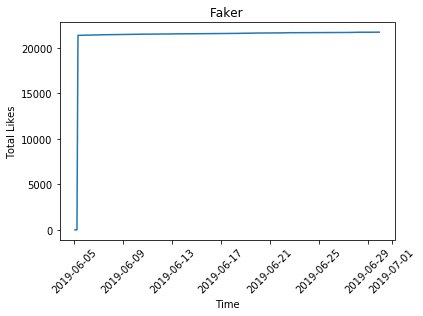

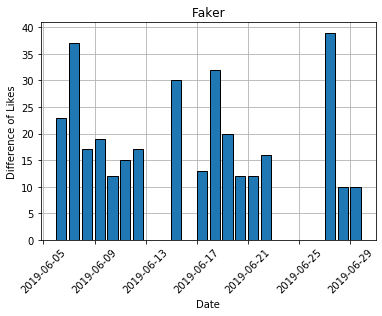

In [0]:
# 시간에 따른 total likes 값들 시각화
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

plt.plot(faker_convert_time, faker_total_likes)
plt.title('Faker')
plt.xlabel('Time')
plt.ylabel('Total Likes')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

# 시간에 따른 total likes 차이값들 시각화(막대그래프)
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

bar_graph = plt.bar(faker_date[1:], faker_differences, align='edge', edgecolor='black')
plt.title('Faker')
plt.xlabel('Date')
plt.ylabel('Difference of Likes')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_axisbelow(True)
plt.grid(True)
plt.show()

In [0]:
average = []
sum = 0

for i in faker_length:
  sum = sum+i
  avg = (faker_total_likes[sum-1] - faker_total_likes[sum-i])/(faker_convert_time[sum-1] - faker_convert_time[sum-i]).seconds*60
  average.append(avg)

faker_avg = np.mean(average)
total_avg['faker'] = faker_avg
print("faker 좋아요 증가율:",faker_avg)

faker 좋아요 증가율: 0.9112518087992625


In [0]:
# 팀: kespa
ke_dic = {} # 딕셔너리
ke_key = [] # 리스트

for root, dirs, files in os.walk('/content/drive/My Drive/grad_data/data/data/kespa'):
    for fname in files:
      if fname.endswith(".json"): #끝이 ".json"로 끝나는 경우
        full_fname = os.path.join(root, fname)
        ke_key.append(fname)
        
        with open(full_fname) as json_file:
          json_data = json.load(json_file)
          ke_dic[fname] = json_data
        
ke_key.sort() #  리스트 오름차순 정렬

In [0]:
ke_total_likes = []
ke_convert_time = []
ke_length = []

for name in ke_key:
  values = ke_dic[name]['results'][0]['series'][0]['values']
  
  # total_likes: 주어진 데이터의 2번째 value들
  length = len(values)
  ke_length.append(length)
  print(name, ":", length)
  
  for i in range(0,length):
      ke_total_likes.append(values[i][2])
  
  # conver_times: 주어진 데이터의 0번째 value들
  for i in range(0, length):
      ke_convert_time.append(datetime.datetime.strptime(values[i][0][:19],"%Y-%m-%dT%H:%M:%S"))  

kespa_20190605.json : 12
kespa_20190606.json : 12
kespa_20190607.json : 12
kespa_20190608.json : 12
kespa_20190609.json : 12
kespa_20190610.json : 12
kespa_20190611.json : 12
kespa_20190612.json : 45
kespa_20190613.json : 144
kespa_20190614.json : 144
kespa_20190615.json : 144
kespa_20190616.json : 144
kespa_20190617.json : 144
kespa_20190618.json : 144
kespa_20190619.json : 144
kespa_20190620.json : 730
kespa_20190621.json : 437
kespa_20190624.json : 437
kespa_20190625.json : 437
kespa_20190627.json : 437
kespa_20190701.json : 437
kespa_20190703.json : 437
kespa_20190704.json : 437
kespa_20190705.json : 437
kespa_20190706.json : 437


In [0]:
# total_likes2 = total_likes의 차이값들(하루 단위)
ke_total_likes2 = []
ke_differences = []
ke_date = []
for name in ke_key:
  values = ke_dic[name]['results'][0]['series'][0]['values']
  length = len(values)  
  ke_total_likes2.append(values[length-1][2])
  ke_date.append(datetime.datetime.strptime(values[0][0][:10],"%Y-%m-%d"))    

for i in range(0,len(ke_date)-1):
  ke_differences.append(ke_total_likes2[i+1]-ke_total_likes2[i])

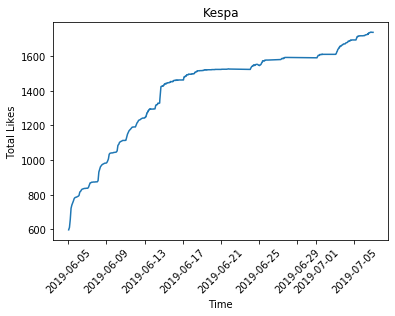

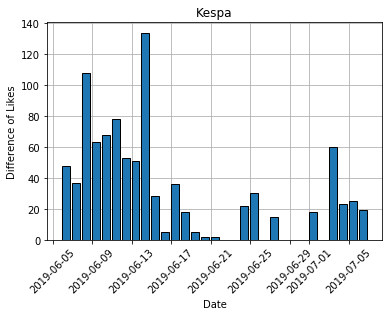

In [0]:
# 시간에 따른 total likes 값들 시각화
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

plt.plot(ke_convert_time, ke_total_likes)
plt.title('Kespa')
plt.xlabel('Time')
plt.ylabel('Total Likes')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

# 시간에 따른 total likes 차이값들 시각화(막대그래프)
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

bar_graph = plt.bar(ke_date[1:], ke_differences, align='edge', edgecolor='black')
plt.title('Kespa')
plt.xlabel('Date')
plt.ylabel('Difference of Likes')
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_axisbelow(True)
plt.grid(True)
plt.show()

In [0]:
average = []
sum = 0

for i in ke_length:
  sum = sum+i
  avg = (ke_total_likes[sum-1] - ke_total_likes[sum-i])/(ke_convert_time[sum-1] - ke_convert_time[sum-i]).seconds*60
  average.append(avg)

ke_avg = np.mean(average)
total_avg['kespa'] = ke_avg
print("kespa 좋아요 증가율:",ke_avg)

kespa 좋아요 증가율: 0.03334752727366862


In [0]:
# 내림차순 정렬
# 딕셔너리 -> 튜플
sort_avg = sorted(total_avg.items(), key=lambda x: x[1], reverse=True)

In [0]:
# 순위 확인을 위해서 Pandas에서 제공하는 dataframe을 활용
import pandas as pd

# 팔로우 수 고려X 좋아요 수 기준 순위
df = pd.DataFrame(sort_avg, columns=['NAME', 'LIKES(per minute)'])
df.index += 1
df

,NAME,LIKES(per minute)
1,T1LoL,0.940678
2,faker,0.911252
3,Griffin,0.266356
4,GenG,0.192937
5,KINGZONEDX,0.095746
6,SBGaming_KOR,0.052648
7,JinAirGW,0.042351
8,kespa,0.033348


In [0]:
# 팔로우 수 고려(대비) 좋아요 수 순위 구하기 위한 과정


# 계정의 팔로우 수 수집
import requests 
from requests_oauthlib import OAuth1
import datetime
import sys

consumer_key = '''your consumer_key'''
consumer_secret = '''your consumer_secret'''
access_token = '''your access_token'''
access_token_secret = '''your access_token_secret'''

oauth = OAuth1(client_key=consumer_key, client_secret=consumer_secret, resource_owner_key=access_token, resource_owner_secret=access_token_secret)

follower = {}
team = ['faker', 'T1LoL', 'Griffin', 'GenG', 'DRXGlobal', 'SBGaming_KOR', 'JinAirGW', 'kespa']

def get_information(twit_id):
    url = 'https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name={0}'.format(twit_id)
    #url += '&count=70&since_id='+since_id
    url+='&count=1'
    r = requests.get(url=url, auth=oauth)
    statuses = r.json()
    
    for status in statuses:
      if twit_id == 'DRXGlobal':
        twit_id = 'KINGZONEDX'
      follower[twit_id] = status['user']['followers_count']

for id in team:
  get_information(id)


In [0]:
# 내림차순 정렬
# 딕셔너리 -> 튜플
follower = sorted(follower.items(), key=lambda x: x[1], reverse=True)

In [0]:
# 팔로우 수 고려(대비) 좋아요 수 기준 순위

follower_df = pd.DataFrame(follower, columns=['NAME', 'FOLLOWER'])

follower_df = pd.merge(follower_df,df, on="NAME")
follower_df.index += 1
follower_df

,NAME,FOLLOWER,LIKES(per minute)
1,T1LoL,584454,0.940678
2,faker,217353,0.911252
3,KINGZONEDX,187476,0.095746
4,JinAirGW,149048,0.042351
5,kespa,50759,0.033348
6,GenG,31498,0.192937
7,Griffin,6879,0.266356
8,SBGaming_KOR,3383,0.052648
